In [1]:
# Import libraries

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

# Read and transform data
mnist = fetch_openml('mnist_784')
inputData, y = mnist["data"], mnist["target"]

inputData = inputData / 255
nDigits = 10

yOneHot = np.zeros([y.shape[0],nDigits])
for i in range(y.shape[0]):
    yOneHot[i, int(y[i])]=1

y = yOneHot

m = 60000
m_test = inputData.shape[0] - m

y_train, y_test = y[:m,:].reshape(m,nDigits), y[m:,:].reshape(m_test,nDigits)
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]


np.random.seed(1002)

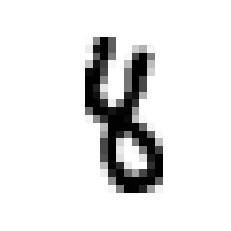

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [2]:
# Show a random input

i = 7000
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i,:])

In [3]:
# Define activation, loss, and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU is very simple

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum
    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [4]:
inputDim = InputData_train.shape[1] #784
nHidden = 64 
learning_rate = 1
weight_decay = 0.001

W1 = 0.01*np.random.randn(nHidden, inputDim) #  64 * 784
b1 = np.zeros((nHidden, 1)) #  64
W2 = 0.01*np.random.randn(nDigits, nHidden) # 10 * 64
b2 = np.zeros((nDigits, 1)) #  10

inputData = InputData_train
y = y_train

In [5]:
print(W1.shape)
print(W2.shape)
print(b1.shape)
print(b2.shape)

(64, 784)
(10, 64)
(64, 1)
(10, 1)


In [6]:
inputData.shape

(60000, 784)

In [7]:
inputData.T.shape

(784, 60000)

(64, 784) (60000, 784) (784, 60000)
Z1 shape  (64, 60000)
A1 shape  (64, 60000)
Z2 shape  (10, 60000)
A2 Shape  (10, 60000)
0.329891786377773 shape () size 1
dZ2 shape  (10, 60000)
dw2 shape (10, 64)
db2 shape (10, 1)
dA1 shape (64, 60000)


<function matplotlib.pyplot.show(*args, **kw)>

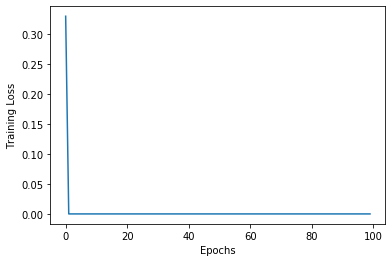

In [27]:
nEpochs = 100
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):
    
    # feed forward start
    
    print(W1.shape, inputData.shape, inputData.T.shape) # 64 * 784, 60,000 * 784, 784 * 60,000
    Z1 = np.matmul(W1,inputData.T) + b1
    print("Z1 shape ", Z1.shape)  # 64 * 60,000
    A1 = relu(Z1)                 # 64 * 60,000
    print("A1 shape ", A1.shape)  # 64 * 60,000 
    Z2 = np.matmul(W2,A1) + b2    # 10 * 64 , 64 * 60,000
    print("Z2 shape ", Z2.shape)  # 10 * 60,000
    A2 = softmax(Z2)              # 10 * 60,000
    print("A2 Shape ", A2.shape)  # 10 * 60,000
    cost = CrossEntropyLoss(y.T, A2) 
    print(cost, "shape", cost.shape, "size", cost.size)
    costPlot[i] = cost
    
    # feed forward done
    
    # backpropagation start

    dZ2 = CE_Softmax_Derivative(A2,y.T) 
    print("dZ2 shape ", dZ2.shape)
    dW2 = (1./m) * np.matmul(dZ2, A1.T) # 10 * 60,000 , 60,000 * 64
    print("dw2 shape", dW2.shape)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    print("db2 shape", db2.shape)    
    dA1 = np.matmul(W2.T, dZ2)
    print("dA1 shape", dA1.shape)
    break
    dZ1 = dA1 * relu_derivative(Z1)
    print("dZ1 shape", dZ1.shape)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

In [ ]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))